This is a simpler project involving unsupervised machine learning (PCA).

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = sns.load_dataset('titanic')

# Drop columns with missing values and the target column 'survived'
df = df.dropna()

# Convert categorical columns to numeric
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

from sklearn.preprocessing import MinMaxScaler

df_ready = pd.get_dummies(df)
# knn_model_output.drop(columns=['assigned_cluster', 'species', 'name'])
x = MinMaxScaler().fit_transform(df_ready)
x

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
model = pca.fit_transform(x)
pca_df = pd.DataFrame(data = model, columns = ['PC1','PC2'])
pca_df

,PC1,PC2
0,-1.004842,-0.811091
1,-0.795582,0.406742
2,1.345203,0.399045
3,-0.619114,1.217500
4,-0.636364,0.427428
...,...,...
177,-0.860438,0.491922
178,1.247887,0.131580
179,-0.984703,-0.823142
180,-0.764844,0.417076


In [ ]:
x

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
loadings = pca.components_.T* np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns= pca_df.columns, index=df_ready.columns)
loading_matrix

,PC1,PC2
survived,-0.395917,0.025059
pclass,0.004321,0.139310
sex,0.439504,-0.059821
age,0.054475,-0.046324
sibsp,-0.035674,0.001836
parch,-0.022720,0.014531
fare,-0.030296,-0.049875
embarked,0.093536,0.436808
who,-0.203759,-0.029566
adult_male,0.445448,-0.104705


In [ ]:
loading_matrix.abs().idxmax(1).sort_values()
pca_model_output = pd.merge(knn_model_output, pca_df, how = 'inner', left_index= True, right_index= True)
pca_model_output
sns.scatterplot(data=pca_model_output, x='PC1',y='PC2', hue = 'assigned_cluster', style='species', legend=False)
plt.xlabel('sepal_length, petal_length, petal_width')
plt.ylabel('sepal_width')
plt.show()

NameError: name 'knn_model_output' is not defined

In [ ]:
df = df.drop('pclass',axis=1)
df = df.drop('alive',axis=1)
df = df.drop('sex',axis=1)
df = df.drop('age',axis=1)
df = df.drop('sibsp',axis=1)
df = df.drop('parch',axis=1)
df = df.drop('embarked',axis=1)
df = df.drop('who',axis=1)
df = df.drop('deck',axis=1)
df = df.drop('embark_town',axis=1)
df["class"] = df["class"].replace('First',1)
df["class"] = df["class"].replace('Second',2)
df["class"] = df["class"].replace('Third',3)

df

,survived,fare,class,adult_male,alone
1,1,71.2833,1,False,False
3,1,53.1000,1,False,False
6,0,51.8625,1,True,True
10,1,16.7000,3,False,False
11,1,26.5500,1,False,True
...,...,...,...,...,...
871,1,52.5542,1,False,False
872,0,5.0000,1,True,True
879,1,83.1583,1,False,False
887,1,30.0000,1,False,True


In [ ]:
df = df.drop('class',axis=1)
df

,survived,fare,adult_male
1,1,71.2833,False
3,1,53.1000,False
6,0,51.8625,True
10,1,16.7000,False
11,1,26.5500,False
...,...,...,...
871,1,52.5542,False
872,0,5.0000,True
879,1,83.1583,False
887,1,30.0000,False


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,:-1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,:-1])

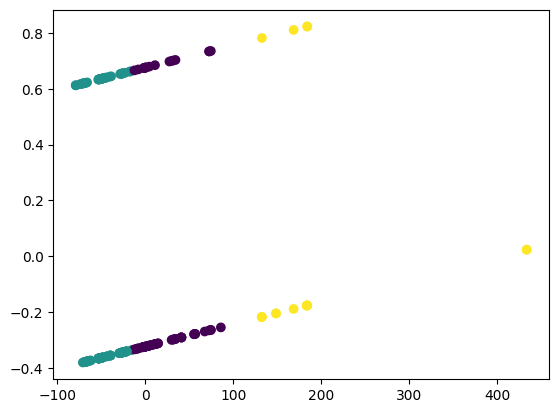

In [ ]:
plt.scatter(pca_result[:,0], pca_result[:,1], c = kmeans.labels_)
plt.show()

In [ ]:
print(pca.components_)

[[ 8.01603778e-04  9.99999679e-01]
 [-9.99999679e-01  8.01603778e-04]]
